<a href="https://colab.research.google.com/github/mfaisal951/pythontask/blob/main/NLPAssignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

In [ ]:
!pip install wordcloud matplotlib


In [ ]:
import nltk
# Removed NLTK downloads from this cell as they are now in SvUNdhEWjU12

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



from nltk.stem import WordNetLemmatizer

from sklearn.ensemble import RandomForestClassifier





In [ ]:
# Removed NLTK downloads from this cell as they are now in SvUNdhEWjU12

# Load the CSV file
try:
    df = pd.read_csv('/content/Tweets.csv')
except FileNotFoundError:
    print("Error: 'Tweets.csv' not found. Please upload the file to /content/.")
    exit()
except Exception as e:
    print(f"An error occurred loading the CSV: {e}")
    exit()

# Define stopwords
# stop_words = set(stopwords.words('english'))

# # Preprocessing function
# def preprocess(text):
#     if not isinstance(text, str):
#       return ""  # Return empty string or handle non-string as needed
#     # Lowercase
#     text = text.lower()
#     # Remove punctuation and special characters, keep spaces for tokenization
#     text = re.sub(r'[^a-z\s]', '', text)
#     # Tokenize
#     tokens = word_tokenize(text)
#     # Remove stop words
#     tokens = [word for word in tokens if word not in stop_words]
#     return ' '.join(tokens) # Return string output

# # Apply preprocessing to 'text' column, handling potential non-string entries
# df['processed_text'] = df['text'].apply(preprocess)

# # Show the processed DataFrame
# print(df[['text', 'processed_text']])

                                                    text  \
0                    @VirginAmerica What @dhepburn said.   
1      @VirginAmerica plus you've added commercials t...   
2      @VirginAmerica I didn't today... Must mean I n...   
3      @VirginAmerica it's really aggressive to blast...   
4      @VirginAmerica and it's a really big bad thing...   
...                                                  ...   
14635  @AmericanAir thank you we got on a different f...   
14636  @AmericanAir leaving over 20 minutes Late Flig...   
14637  @AmericanAir Please bring American Airlines to...   
14638  @AmericanAir you have my money, you change my ...   
14639  @AmericanAir we have 8 ppl so we need 2 know h...   

                                          processed_text  
0                            virginamerica dhepburn said  
1      virginamerica plus youve added commercials exp...  
2      virginamerica didnt today must mean need take ...  
3      virginamerica really aggressive blas

In [ ]:
!pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 8.0 MB/s eta 0:00:00


In [ ]:
import re
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from contractions import fix  # You may need to install this package

# Required downloads (only once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to expand contractions (optional)
def expand_contractions(text):
    try:
        return fix(text)
    except:
        return text

# Preprocessing function
def preprocess(text):
    if not isinstance(text, str):
        return ""

    # Expand contractions (e.g., can't -> cannot)
    text = expand_contractions(text)

    # Lowercase
    text = text.lower()

    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove special characters and numbers (optional)
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words and short tokens
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Apply to your DataFrame
df['processed_text'] = df['text'].apply(preprocess)

# Show the results
print(df[['text', 'processed_text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                      processed_text  
0                        virginamerica dhepburn said  
1  virginamerica plus added commercial experience...  
2  virginamerica today must mean need take anothe...  
3  virginamerica really aggressive blast obnoxiou...  
4                 virginamerica really big bad thing  


Task 2: Word Frequency Count
• Objective: Count the frequency of words in a text.
• Instructions:
1. Use the processed text from Task 1.
2. Create a word frequency dictionary that counts how many times each word appears.
3. Print the top 5 most common words and their frequencies.

In [ ]:
all_words = ' '.join(df['processed_text']).split()

# Step 2: Create a frequency dictionary using Counter
word_freq = Counter(all_words)

# Step 3: Get the top 5 most common words
top_5 = word_freq.most_common(5)

# Step 4: Print the top 5
print("\nTop 5 Most Common Words:")
for word, freq in top_5:
    print(f"{word}: {freq}")


Top 5 Most Common Words:
flight: 4542
united: 4145
usairways: 3051
americanair: 2957
southwestair: 2454


Task 3: Sentiment Analysis
• Objective: Perform basic sentiment analysis.
• Instructions:
1. Use a model.
2. Choose a few sentences with clear positive or negative sentiments.
3. Use the model to predict the sentiment of each sentence and print the results.

In [ ]:
sia = SentimentIntensityAnalyzer()


In [ ]:
def get_sentiment(text):
    if not isinstance(text, str):
        return "Neutral"  # or handle it as needed
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"


In [ ]:
# Use the original 'text' or 'processed_text' column for sentiment
sample_texts = df['text'].dropna().sample(5, random_state=42)  # Pick 5 random samples

for i, text in enumerate(sample_texts, 1):
    sentiment = get_sentiment(text)
    print(f"Sample {i}:")
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {sentiment}\n")


Sample 1:
Text: @SouthwestAir you're my early frontrunner for best airline! #oscars2016
Predicted Sentiment: Positive

Sample 2:
Text: @USAirways how is it that my flt to EWR was Cancelled Flightled yet flts to NYC from USAirways are still flying?
Predicted Sentiment: Negative

Sample 3:
Text: @JetBlue what is going on with your BDL to DCA flights yesterday and today?! Why is every single one getting delayed?
Predicted Sentiment: Negative

Sample 4:
Text: @JetBlue do they have to depart from Washington, D.C.??
Predicted Sentiment: Neutral

Sample 5:
Text: @JetBlue I can probably find some of them. Are the ticket #s on there?
Predicted Sentiment: Neutral



ACCURACY **before training**

In [ ]:
# Assuming your actual labels are in a column called 'airline_sentiment'
# And your prediction function from Task 3 exists

# Apply prediction
df['predicted_sentiment'] = df['text'].apply(get_sentiment)

# Drop rows where actual sentiment is missing
df = df.dropna(subset=['airline_sentiment'])

# Normalize both actual and predicted to capitalize (for matching)
df['airline_sentiment'] = df['airline_sentiment'].str.capitalize()
df['predicted_sentiment'] = df['predicted_sentiment'].str.capitalize()

# Calculate accuracy
correct = (df['airline_sentiment'] == df['predicted_sentiment']).sum()
total = len(df)
accuracy = correct / total * 100

print(f"\nAccuracy of Sentiment Prediction: {accuracy:.2f}%")



Accuracy of Sentiment Prediction: 54.28%


In [ ]:
# import matplotlib.pyplot as plt

# # Count actual vs predicted
# actual_counts = df['airline_sentiment'].value_counts()
# predicted_counts = df['predicted_sentiment'].value_counts()



Task 4: Named Entity Recognition (NER)
• Objective: Identify named entities in text.
• Instructions:
1. Use an NER model from a library like SpaCy or Hugging Face.
2. Input a sample text (e.g., a news article).
3. Extract and print the named entities (e.g., people, organizations, locations).

In [ ]:
import spacy

# Load English model
nlp = spacy.load("en_core_web_sm")


In [ ]:
# Sample text (can be from your CSV too)
sample_text = """
Elon Musk, the CEO of Tesla and SpaceX, announced a new partnership with NASA in Washington, D.C. on Monday.
Apple Inc. shares rose by 2.5% after the release of the new iPhone 14.
"""

# Process the text
doc = nlp(sample_text)

# Extract and print named entities
print("Named Entities Found:\n")
for ent in doc.ents:
    print(f"{ent.text} --> {ent.label_}")


Named Entities Found:

Elon Musk --> PERSON
Tesla --> ORG
SpaceX --> PERSON
NASA --> ORG
Washington --> GPE
D.C. --> GPE
Monday --> DATE
Apple Inc. --> ORG
2.5% --> PERCENT
iPhone --> ORG
14 --> CARDINAL


Classification

In [ ]:
# Apply to a few random tweets
sample_tweets = df['text'].dropna().sample(3, random_state=42)

for i, tweet in enumerate(sample_tweets, 1):
    print(f"\nTweet {i}: {tweet}")
    doc = nlp(tweet)
    for ent in doc.ents:
        print(f"  {ent.text} --> {ent.label_}")



Tweet 1: @SouthwestAir you're my early frontrunner for best airline! #oscars2016
  oscars2016 --> PERSON

Tweet 2: @USAirways how is it that my flt to EWR was Cancelled Flightled yet flts to NYC from USAirways are still flying?
  EWR --> ORG
  NYC --> LOC
  USAirways --> ORG

Tweet 3: @JetBlue what is going on with your BDL to DCA flights yesterday and today?! Why is every single one getting delayed?
  BDL --> ORG
  DCA --> ORG
  yesterday --> DATE
  today --> DATE


In [ ]:
# Combine all words into one large string
all_text = ' '.join(df['processed_text'].dropna())


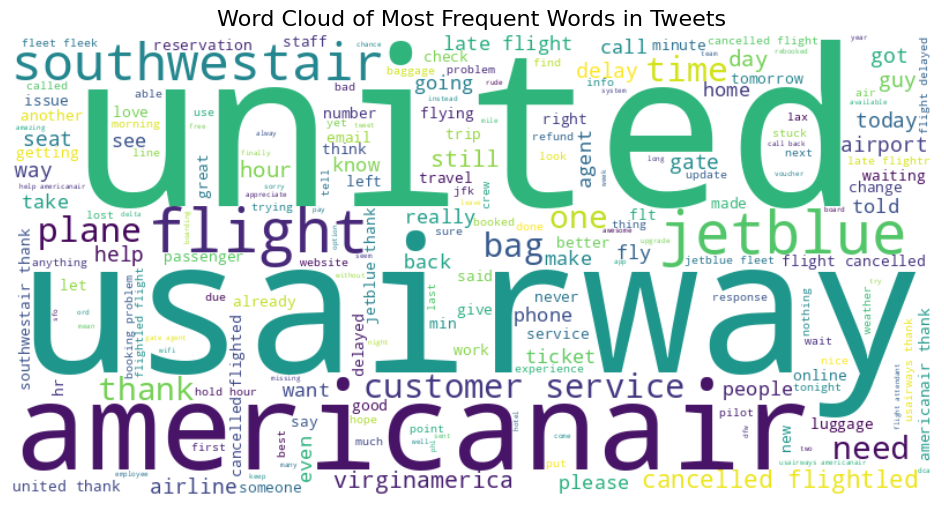

In [ ]:
# Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'  # Optional color scheme
).generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title("Word Cloud of Most Frequent Words in Tweets", fontsize=16)
plt.show()


In [ ]:
# Load CSV
df = pd.read_csv('/content/Tweets.csv')

# Keep only necessary columns
df = df[['text', 'airline_sentiment']].dropna()

# Optional: Normalize labels
df['airline_sentiment'] = df['airline_sentiment'].str.lower()




# Apply prediction (assuming get_sentiment function is defined)
# Make sure the get_sentiment function is defined and accessible
if 'get_sentiment' in globals() and callable(get_sentiment):
    df['predicted_sentiment'] = df['text'].apply(get_sentiment)
else:
    print("Error: 'get_sentiment' function not found. Please ensure it is defined before running this cell.")
    # You might want to handle this case differently, e.g., exit or skip the prediction step
    # For now, we'll just print an error and the column won't be added, which will likely cause
    # an error later if the plotting cell is run.

# Drop rows where actual sentiment is missing (already handled by .dropna() above, but good to double check)
# df = df.dropna(subset=['airline_sentiment']) # This is already done by the initial dropna

# Normalize both actual and predicted to capitalize (for matching in plotting if needed, though lowercase is used below)
# df['airline_sentiment'] = df['airline_sentiment'].str.capitalize() # Keeping lowercase for consistency with model training
# df['predicted_sentiment'] = df['predicted_sentiment'].str.capitalize() # Keeping lowercase for consistency with model training

# Note: The original plotting code was expecting capitalized sentiments.
# The model training and evaluation uses lowercase. Let's keep lowercase for consistency.
# The plotting code will need to be updated to expect lowercase labels.

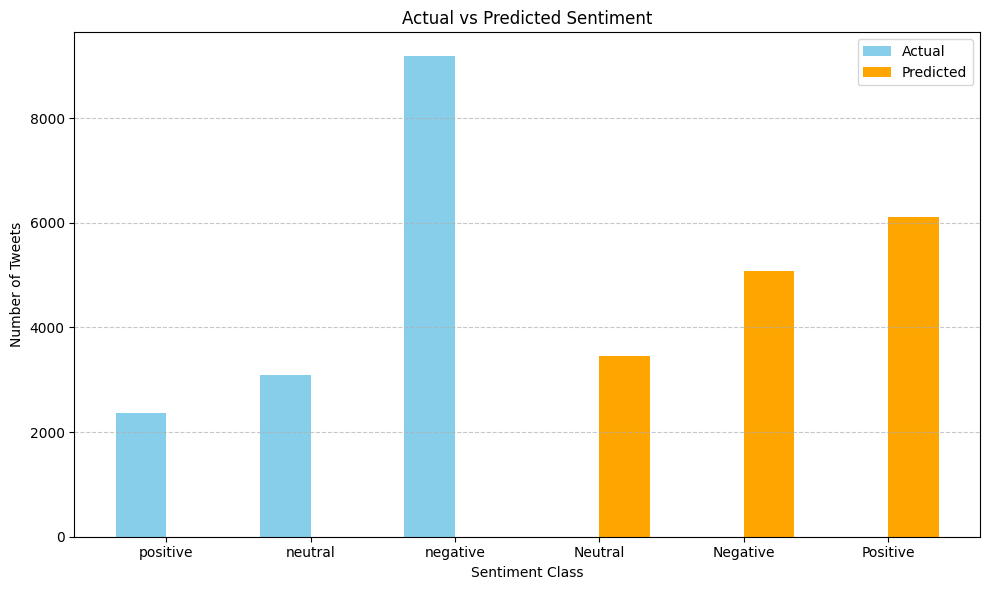

In [ ]:
# Create a bar chart
labels = list(set(actual_counts.index).union(set(predicted_counts.index)))
actual_values = [actual_counts.get(label, 0) for label in labels]
predicted_values = [predicted_counts.get(label, 0) for label in labels]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, actual_values, width=width, label='Actual', color='skyblue')
plt.bar([p + width for p in x], predicted_values, width=width, label='Predicted', color='orange')

plt.xlabel("Sentiment Class")
plt.ylabel("Number of Tweets")
plt.title("Actual vs Predicted Sentiment")
plt.xticks([p + width/2 for p in x], labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Train test

In [ ]:
X = df['text']              # Input (tweets)
y = df['airline_sentiment'] # Output (labels)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Vectorizer and classifier
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
classifier = LogisticRegression(max_iter=1000)

# Transform and train
X_train_vec = vectorizer.fit_transform(X_train)
classifier.fit(X_train_vec, y_train)

# Predict
X_test_vec = vectorizer.transform(X_test)
y_pred = classifier.predict(X_test_vec)


In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 79.58%

Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.93      0.87      1889
     neutral       0.65      0.49      0.56       580
    positive       0.79      0.63      0.70       459

    accuracy                           0.80      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.79      0.80      0.79      2928



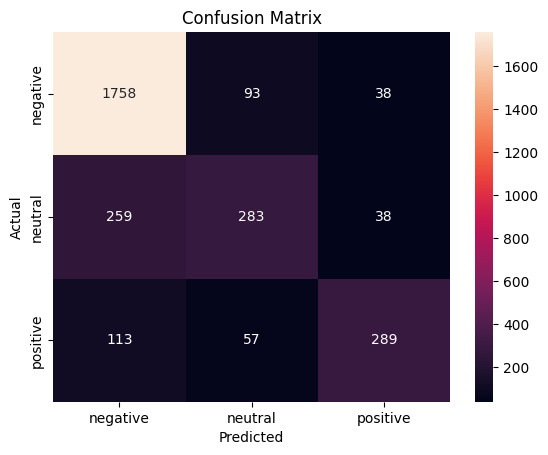

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
